In [1]:
from qiskit import*
from qiskit.tools.visualization import*
from numpy import*
from matplotlib.pyplot import*

In [9]:
qr2=QuantumRegister(1)
cr2=ClassicalRegister(1)
qc2=QuantumCircuit(qr2,cr2)

def phi(E):
    return(2*(1.27*m*L)/E)

m=7*10**-5 #delta m_square
L=180
E=arange(2*10**-3,12*10**-3,10**-3)
E3=arange(1*10**-3,15*10**-3,0.5*10**-3)
th=1.1592# 2*mixing angle

In [10]:
backend=BasicAer.get_backend('qasm_simulator')
app_counts2=[]
dis_counts2=[]
Phi2=phi(E3)

for phi in Phi2:
    qc2.u(th,0,0,qr2[0])
    qc2.u(0,0,phi,qr2[0])
    qc2.u(-1*th,0,0,qr2[0])
    qc2.measure(qr2[0],cr2[0])
    job=execute(qc2,backend=backend,shots=1024).result().get_counts()
    if '0' in job:
            app_counts2.append(job['0']/1024)
            dis_counts2.append((1024-job['0'])/1024)
    else:
        app_counts2.append(0)
        dis_counts2.append(1)
    qc2.reset(qr2[0])


In [16]:
E2=arange(1*10**-3,15*10**-3,10**-4)
def true_function(E):
    p= 1-(0.84*(sin(1.27*m*L/E))**2)#appearance probability
    return(p)
Th_curve=true_function(E2)

In [17]:
AC=true_function(E3)
yerr1=[p-q for p,q in zip(app_counts2,AC)]

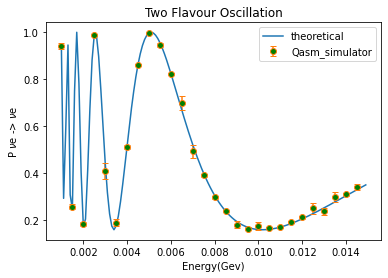

In [18]:
plot(E2,Th_curve,label='theoretical')
errorbar(E3,app_counts2,yerr1,fmt='o',mfc='green',capsize=3,label='Qasm_simulator')
title('Two Flavour Oscillation')
xlabel('Energy(Gev)')
ylabel('P $\\nu$e -> $\\nu$e')
legend()
#savefig('tfo_kamland.pdf')